In [1]:
import math
import numpy as np
import joblib
import os
import matplotlib.pyplot as plt
from collections import defaultdict


# Defining the function that predicts the speaker :

In [2]:
def get_scores(mfcc_features, gmm_models):
    scores = {}
    for model_name, gmm_model in gmm_models.items():
        scores[model_name.split(".")[0]] = gmm_model.score(mfcc_features)
    return scores


# Loading all the gmm models and storing them in dictionaries according to the  n_components and gender : 
## key: model_name , value: gmm model 

In [3]:
# Load all GMM models from the appropriate folder
model_folder = r'GMM\F'
gmm_models_F_16 = {}
gmm_models_F_32 = {}
gmm_models_F_128 = {}
gmm_models_F_256 = {}
for model_filename in os.listdir(model_folder):
    model_path = os.path.join(model_folder, model_filename)
    gmm_model = joblib.load(model_path)
    if model_filename.endswith(".16.gmm"):
        gmm_models_F_16[model_filename] = gmm_model
    elif model_filename.endswith(".32.gmm"):
        gmm_models_F_32[model_filename] = gmm_model
    elif model_filename.endswith(".128.gmm"):
        gmm_models_F_128[model_filename] = gmm_model
    elif model_filename.endswith(".256.gmm"):
        gmm_models_F_256[model_filename] = gmm_model

# Loading the files containing the mfcc features and storing them in dictionaries according to duration and gender:
## key: file_name , value: mfcc_features

In [4]:
# Set the path to the test folder
test_folder = r'MFCC\Test-segments'

# Initialize dictionaries to store the loaded test files
test_files_3_H = {}
test_files_3_F = {}
test_files_10_H = {}
test_files_10_F = {}
test_files_15_H = {}
test_files_15_F = {}
test_files_30_H = {}
test_files_30_F = {}

# Set the duration sub-folders
duration_folders = ["3", "10", "15", "30"]

for duration_folder in duration_folders:
    duration_folder_path = os.path.join(test_folder, duration_folder)

    # Check if the duration sub-folder exists
    if os.path.isdir(duration_folder_path):
        # Iterate over the gender sub-folders
        for gender_folder in os.listdir(duration_folder_path):
            gender_folder_path = os.path.join(duration_folder_path, gender_folder)

            # Check if the item in the duration sub-folder is a directory
            if os.path.isdir(gender_folder_path):
                # Determine the appropriate dictionary based on duration and gender
                if duration_folder == "3" and gender_folder == "H":
                    test_files_dict = test_files_3_H
                elif duration_folder == "3" and gender_folder == "F":
                    test_files_dict = test_files_3_F
                elif duration_folder == "10" and gender_folder == "H":
                    test_files_dict = test_files_10_H
                elif duration_folder == "10" and gender_folder == "F":
                    test_files_dict = test_files_10_F
                elif duration_folder == "15" and gender_folder == "H":
                    test_files_dict = test_files_15_H
                elif duration_folder == "15" and gender_folder == "F":
                    test_files_dict = test_files_15_F
                elif duration_folder == "30" and gender_folder == "H":
                    test_files_dict = test_files_30_H
                elif duration_folder == "30" and gender_folder == "F":
                    test_files_dict = test_files_30_F

                # Iterate over the test segments within the gender sub-folder
                for filename in os.listdir(gender_folder_path):
                    if filename.endswith(".mfcc"):
                        test_segment_path = os.path.join(gender_folder_path, filename)

                        # Load the MFCC features
                        mfcc_features = np.genfromtxt(test_segment_path, delimiter=',')

                        # Add the loaded features to the corresponding dictionary with the filename as the key
                        test_files_dict[filename] = mfcc_features


# Plotting the DET curve :


## a. GMM 16 :
### 3 second segments :


## Get the scores :

In [5]:
results_3_F_16 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_3_F.items():
    score = get_scores(test_segment, gmm_models_F_16)
    results_3_F_16.append((test_segment_name, score))

# Printing the results
for result in results_3_F_16:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")


File: F1.3.1.mfcc ,Score: {'F1': -52.38556438369983, 'F2': -54.09281773349176, 'F3': -57.28725124325555, 'F4': -62.88214232082617, 'F5': -62.87246332024069, 'F6': -57.80858608187659}
File: F1.3.10.mfcc ,Score: {'F1': -50.68573843343561, 'F2': -53.428288869001264, 'F3': -56.02285604504211, 'F4': -60.99657229988099, 'F5': -64.07471867698656, 'F6': -54.93764224787023}
File: F1.3.11.mfcc ,Score: {'F1': -52.27061908734399, 'F2': -53.88948989967767, 'F3': -56.729571683462275, 'F4': -61.161899424251025, 'F5': -67.07085527852892, 'F6': -59.189316047188996}
File: F1.3.12.mfcc ,Score: {'F1': -52.043161533948464, 'F2': -52.73260119044819, 'F3': -54.761436346116646, 'F4': -60.111697412352974, 'F5': -65.82647748025494, 'F6': -57.69728810979307}
File: F1.3.13.mfcc ,Score: {'F1': -55.3123037319506, 'F2': -58.2214437836137, 'F3': -52.04480177715755, 'F4': -58.14580240036686, 'F5': -75.25153429158178, 'F6': -62.36682517201455}
File: F1.3.14.mfcc ,Score: {'F1': -50.02928755859594, 'F2': -53.276968359181

## Sort the scores :

In [6]:
scores = [score for _, score in results_3_F_16]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)

# Plot DET curve :

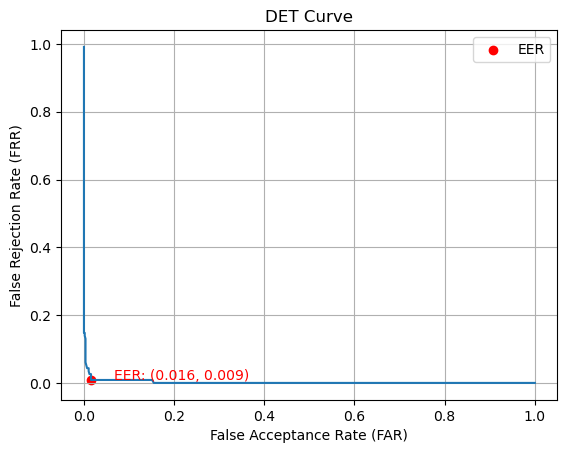

In [7]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_3_F_16:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


## 10 seconds segments :

### Get the scores 

In [8]:
results_10_F_16 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_10_F.items():
    score = get_scores(test_segment, gmm_models_F_16)
    results_10_F_16.append((test_segment_name, score))

# Printing the results
for result in results_10_F_16:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")




File: F1.10.1.mfcc ,Score: {'F1': -51.89459715056389, 'F2': -54.02569166263359, 'F3': -56.692217377730955, 'F4': -60.757663078291785, 'F5': -64.89065713677624, 'F6': -58.374660295226064}
File: F1.10.2.mfcc ,Score: {'F1': -52.115414027909836, 'F2': -53.26756133538452, 'F3': -56.534812582180855, 'F4': -60.905901903216844, 'F5': -65.66724530522389, 'F6': -58.39396609868802}
File: F1.10.3.mfcc ,Score: {'F1': -52.26604771668157, 'F2': -53.07384444957058, 'F3': -57.39411538691663, 'F4': -62.10118546808248, 'F5': -65.17932753865256, 'F6': -57.557458295337035}
File: F1.10.4.mfcc ,Score: {'F1': -52.9130926789827, 'F2': -54.77271643831537, 'F3': -54.65345144572596, 'F4': -59.43648764125264, 'F5': -68.98744907724924, 'F6': -59.23239401430622}
File: F1.10.5.mfcc ,Score: {'F1': -51.12362716436497, 'F2': -54.70103580491268, 'F3': -55.40598419048166, 'F4': -59.14912222928677, 'F5': -68.17186669858089, 'F6': -57.343922947904936}
File: F1.10.6.mfcc ,Score: {'F1': -50.527014852405586, 'F2': -55.36802373

## Sort the scores :

In [9]:
scores = [score for _, score in results_10_F_16]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)

## Plot DET curve

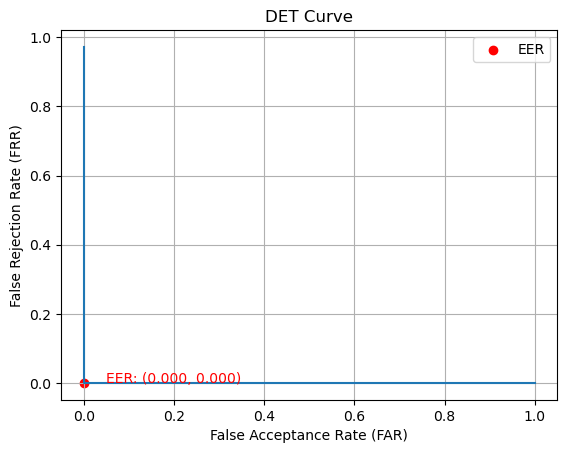

In [10]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_10_F_16:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 15 seconds segments :

## Get the scores

In [11]:
results_15_F_16 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_15_F.items():
    score = get_scores(test_segment, gmm_models_F_16)
    results_15_F_16.append((test_segment_name, score))

# Printing the results
for result in results_15_F_16:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: F1.15.1.mfcc ,Score: {'F1': -51.82821941288407, 'F2': -53.77816793895342, 'F3': -56.61006607325886, 'F4': -60.600209014379054, 'F5': -65.10595528368466, 'F6': -57.998128997712065}
File: F1.15.2.mfcc ,Score: {'F1': -52.355819850552805, 'F2': -53.13323035943903, 'F3': -57.1373641579601, 'F4': -61.90962461868169, 'F5': -65.3855313700838, 'F6': -58.21926079512201}
File: F1.15.3.mfcc ,Score: {'F1': -52.0452173053903, 'F2': -54.30920167356828, 'F3': -55.16029663810855, 'F4': -59.32681066153416, 'F5': -68.09108309163815, 'F6': -58.10181960830367}
File: F1.15.4.mfcc ,Score: {'F1': -51.14253532278904, 'F2': -55.65243722791019, 'F3': -55.33960783399782, 'F4': -59.11952635385316, 'F5': -66.48641212988764, 'F6': -57.51078615385879}
File: F2.15.1.mfcc ,Score: {'F1': -55.802135657695025, 'F2': -50.5863756517662, 'F3': -54.87858865269417, 'F4': -60.809614194430004, 'F5': -63.62447900011586, 'F6': -56.71319239065484}
File: F2.15.2.mfcc ,Score: {'F1': -55.449252020511864, 'F2': -50.1246679259805,

## Sort the scores 

In [12]:
# Extract the scores from results_15_H_16
scores = [score for _, score in results_15_F_16]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot the Det curve 

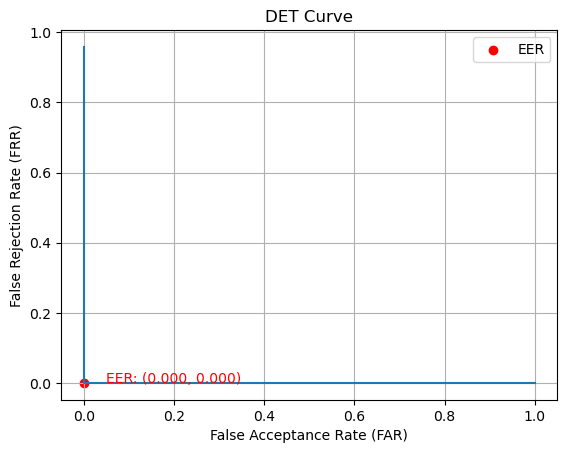

In [13]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_15_F_16:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 30 seconds segments :

## Get the scores

In [14]:
results_30_F_16 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_30_F.items():
    score = get_scores(test_segment, gmm_models_F_16)
    results_30_F_16.append((test_segment_name, score))

# Printing the results
for result in results_30_F_16:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: F1.30.1.mfcc ,Score: {'F1': -52.09201963171844, 'F2': -53.45569914919623, 'F3': -56.87371511560948, 'F4': -61.25491681653037, 'F5': -65.24574332688422, 'F6': -58.10869489641704}
File: F1.30.2.mfcc ,Score: {'F1': -51.654259802721725, 'F2': -54.890965825222025, 'F3': -55.23795749619212, 'F4': -59.23703446478344, 'F5': -67.39608954584597, 'F6': -57.84583913256904}
File: F2.30.1.mfcc ,Score: {'F1': -55.62569383910345, 'F2': -50.355521788873354, 'F3': -54.72307956187589, 'F4': -61.48433473179043, 'F5': -62.736285433053894, 'F6': -56.58088206983331}
File: F2.30.2.mfcc ,Score: {'F1': -55.742065272238804, 'F2': -50.453359448103, 'F3': -54.65565579480631, 'F4': -61.48858914161404, 'F5': -62.56269644764954, 'F6': -57.12439166586408}
File: F3.30.1.mfcc ,Score: {'F1': -57.35508293100652, 'F2': -56.550063566480375, 'F3': -49.761446511500225, 'F4': -64.7332807497946, 'F5': -65.73020232130183, 'F6': -60.58189438575178}
File: F3.30.2.mfcc ,Score: {'F1': -57.09714561618425, 'F2': -56.224248088799

## Sort the scores 

In [15]:
# Extract the scores from results_30_F_16
scores = [score for _, score in results_30_F_16]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot the Det curve

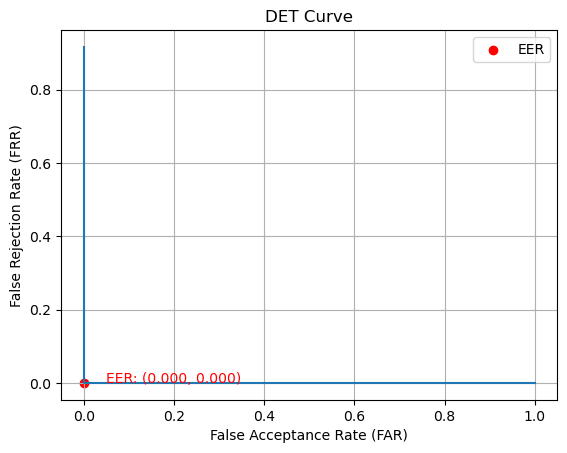

In [16]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_30_F_16:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


## b. GMM 32:
### 3 seconds segments :

## Get scores

In [17]:
results_3_F_32 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_3_F.items():
    score = get_scores(test_segment, gmm_models_F_32)
    results_3_F_32.append((test_segment_name, score))

# Printing the results
for result in results_3_F_32:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: F1.3.1.mfcc ,Score: {'F1': -53.243223604949, 'F2': -55.11789512377594, 'F3': -58.75007873552489, 'F4': -67.28397655996503, 'F5': -64.56912451464166, 'F6': -58.688778405361276}
File: F1.3.10.mfcc ,Score: {'F1': -51.118228398245385, 'F2': -54.164390391813555, 'F3': -56.413485683797504, 'F4': -67.50953104336905, 'F5': -65.72614014869133, 'F6': -56.21974755726219}
File: F1.3.11.mfcc ,Score: {'F1': -52.873031108378974, 'F2': -54.57519258609099, 'F3': -58.28054566733646, 'F4': -67.03875059497508, 'F5': -68.65644141213927, 'F6': -60.16502698063685}
File: F1.3.12.mfcc ,Score: {'F1': -52.44635765794575, 'F2': -53.69200167728986, 'F3': -55.79787239213878, 'F4': -63.908600332483594, 'F5': -67.94514755905298, 'F6': -58.99157493181055}
File: F1.3.13.mfcc ,Score: {'F1': -53.586678220660616, 'F2': -58.80237920283546, 'F3': -52.62559128714363, 'F4': -58.82749193968537, 'F5': -68.66117062245928, 'F6': -64.64148287431253}
File: F1.3.14.mfcc ,Score: {'F1': -50.948435473771596, 'F2': -53.78491114029

## Sort the scores

In [18]:
# Extract the scores from results_3_F_32
scores = [score for _, score in results_3_F_32]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot the Det curve

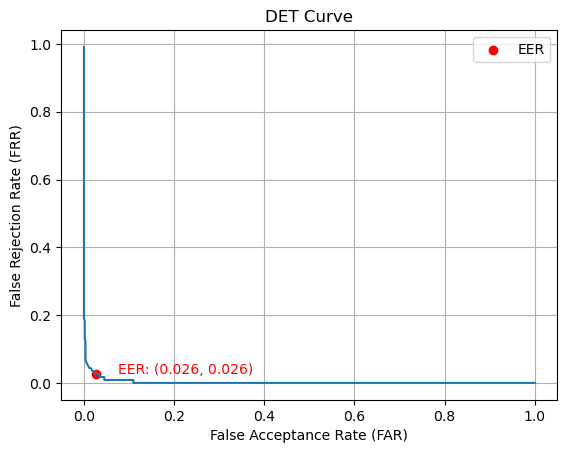

In [19]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_3_F_32:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 10 seconds segments :

## Get scores

In [20]:
results_10_F_32 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_10_F.items():
    score = get_scores(test_segment, gmm_models_F_32)
    results_10_F_32.append((test_segment_name, score))

# Printing the results
for result in results_10_F_32:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: F1.10.1.mfcc ,Score: {'F1': -52.668055266919914, 'F2': -55.205471937335645, 'F3': -58.08410437783894, 'F4': -65.43000449274493, 'F5': -65.68457045051954, 'F6': -59.48963469545817}
File: F1.10.2.mfcc ,Score: {'F1': -53.05423713882975, 'F2': -54.32418896864928, 'F3': -58.327299728106865, 'F4': -65.43646234433488, 'F5': -66.98691767964135, 'F6': -59.500013137246846}
File: F1.10.3.mfcc ,Score: {'F1': -53.31681499564852, 'F2': -54.38444893386735, 'F3': -58.60753719867239, 'F4': -68.20194614156902, 'F5': -66.57047961875338, 'F6': -58.74517485056579}
File: F1.10.4.mfcc ,Score: {'F1': -52.77768764218094, 'F2': -55.47097967870198, 'F3': -55.596277931550645, 'F4': -63.229359494839564, 'F5': -68.36903102677469, 'F6': -60.660873259946975}
File: F1.10.5.mfcc ,Score: {'F1': -51.609235907024086, 'F2': -55.241959497559456, 'F3': -56.593409723468675, 'F4': -65.83895651004455, 'F5': -68.29742393163001, 'F6': -58.027731316622685}
File: F1.10.6.mfcc ,Score: {'F1': -51.46452701628478, 'F2': -56.71622

## Sort the scores 

In [21]:
# Extract the scores from results_3_F_32
scores = [score for _, score in results_10_F_32]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot the Det curve 

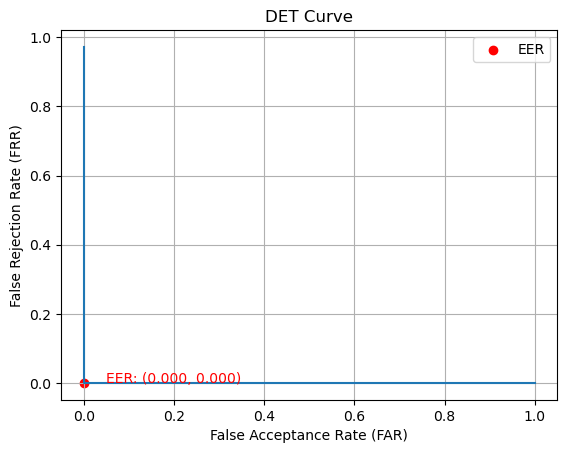

In [22]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_10_F_32:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 15 seconds segments :

## Get the scores 

In [23]:
results_15_F_32 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_15_F.items():
    score = get_scores(test_segment, gmm_models_F_32)
    results_15_F_32.append((test_segment_name, score))

# Printing the results
for result in results_15_F_32:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: F1.15.1.mfcc ,Score: {'F1': -52.62496994669978, 'F2': -54.829070129516246, 'F3': -58.02891842980657, 'F4': -64.84202317284989, 'F5': -66.15978429470161, 'F6': -59.203177113877764}
File: F1.15.2.mfcc ,Score: {'F1': -53.401101654232335, 'F2': -54.447003097051926, 'F3': -58.65037577327222, 'F4': -67.87025214624933, 'F5': -66.66819420457459, 'F6': -59.28670467496943}
File: F1.15.3.mfcc ,Score: {'F1': -52.24312237920003, 'F2': -54.94471405756124, 'F3': -56.29657510884275, 'F4': -64.22120522272398, 'F5': -68.22383111252574, 'F6': -59.261531183961495}
File: F1.15.4.mfcc ,Score: {'F1': -51.717560587194555, 'F2': -56.66191165919631, 'F3': -56.25809168623928, 'F4': -64.17162002385881, 'F5': -67.1336085467438, 'F6': -58.94202012104201}
File: F2.15.1.mfcc ,Score: {'F1': -57.2182771540581, 'F2': -51.22320693854715, 'F3': -55.79502396664499, 'F4': -64.97936627770301, 'F5': -64.47942566566708, 'F6': -57.340053644051544}
File: F2.15.2.mfcc ,Score: {'F1': -56.69969896988785, 'F2': -50.69269913545

## Sort the scores 

In [24]:
# Extract the scores from results_15_F_32
scores = [score for _, score in results_15_F_32]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)

# Print the sorted array
print(sorted_scores_array)

[-72.42686629 -71.85777575 -71.73263589 -71.43759754 -69.11462581
 -68.70716433 -68.57791617 -68.33071773 -68.22383111 -68.14428763
 -68.12297099 -67.87025215 -67.60689948 -67.23792633 -67.16884955
 -67.13360855 -66.73994387 -66.71471015 -66.68250432 -66.6681942
 -66.54198367 -66.28357124 -66.15978429 -65.84965726 -65.76718911
 -65.7288126  -64.97936628 -64.90007319 -64.84202317 -64.83737252
 -64.47942567 -64.22120522 -64.17162002 -63.70955389 -63.5017111
 -63.10889979 -62.1675537  -61.70192645 -61.29794092 -61.11544992
 -61.03253639 -60.70237495 -60.34339916 -60.32509227 -60.2004437
 -60.15048516 -59.95986538 -59.87869868 -59.80344115 -59.28670467
 -59.26153118 -59.20317711 -59.171131   -59.12644581 -59.07435392
 -58.94202012 -58.89019334 -58.84664026 -58.81001986 -58.79705402
 -58.73823481 -58.65037577 -58.63815614 -58.61308017 -58.60628762
 -58.55121287 -58.46261062 -58.43110987 -58.41981717 -58.39359718
 -58.35266933 -58.29691933 -58.29255493 -58.2761616  -58.25386272
 -58.18649398

## Plot the Det curve

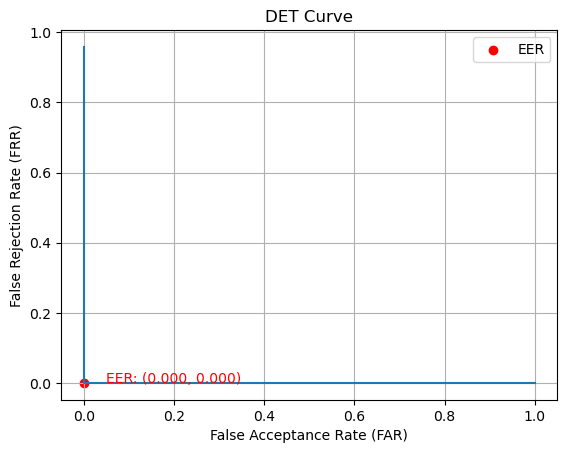

In [25]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_15_F_32:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 30 seconds segments :

## Get the scores 

In [26]:
results_30_F_32 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_30_F.items():
    score = get_scores(test_segment, gmm_models_F_32)
    results_30_F_32.append((test_segment_name, score))

# Printing the results
for result in results_30_F_32:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: F1.30.1.mfcc ,Score: {'F1': -53.013035800466064, 'F2': -54.638036613284086, 'F3': -58.3396471015394, 'F4': -66.35613765954962, 'F5': -66.4139892496381, 'F6': -59.24494089442359}
File: F1.30.2.mfcc ,Score: {'F1': -52.01549811100716, 'F2': -55.68844363105853, 'F3': -56.27990768544759, 'F4': -64.199729547025, 'F5': -67.75164855002156, 'F6': -59.1231488415179}
File: F2.30.1.mfcc ,Score: {'F1': -56.958988061972974, 'F2': -50.9579530370024, 'F3': -55.614125685794214, 'F4': -65.85965507338788, 'F5': -63.79416272602436, 'F6': -57.37980982289011}
File: F2.30.2.mfcc ,Score: {'F1': -57.1236025524269, 'F2': -51.02317414414988, 'F3': -55.49244426493219, 'F4': -66.59154381005135, 'F5': -63.58945982729313, 'F6': -57.824706017540805}
File: F3.30.1.mfcc ,Score: {'F1': -58.30810125493844, 'F2': -58.133804457733774, 'F3': -50.661345376470706, 'F4': -69.22367302079064, 'F5': -66.13539813285674, 'F6': -61.732747309203276}
File: F3.30.2.mfcc ,Score: {'F1': -57.56833178218847, 'F2': -57.882681023793324

## Sort the scores

In [27]:
# Extract the scores from results_30_H_32
scores = [score for _, score in results_30_F_32]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot the Det curve 

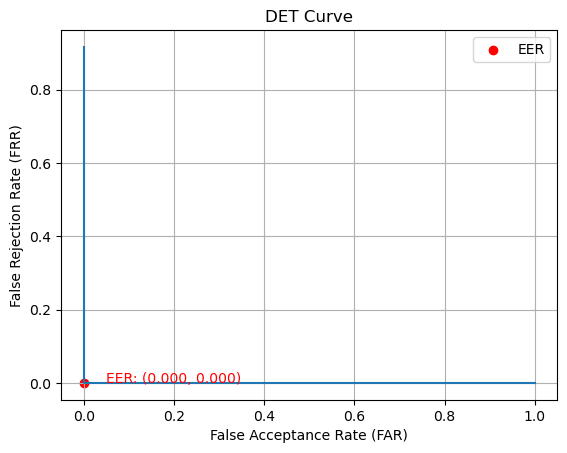

In [28]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_30_F_32:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


## c. GMM 128:
### 3 seconds segments :

## Get the scores

In [29]:
results_3_F_128 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_3_F.items():
    score = get_scores(test_segment, gmm_models_F_128)
    results_3_F_128.append((test_segment_name, score))

# Printing the results
for result in results_3_F_128:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: F1.3.1.mfcc ,Score: {'F1': -59.2303015734698, 'F2': -61.77347811811446, 'F3': -67.50588131585131, 'F4': -94.35829151453676, 'F5': -74.29120587799798, 'F6': -68.27618013791196}
File: F1.3.10.mfcc ,Score: {'F1': -55.635464764634285, 'F2': -59.056258675198876, 'F3': -65.8695726748634, 'F4': -90.21469759937366, 'F5': -76.2842474779574, 'F6': -62.9100366537239}
File: F1.3.11.mfcc ,Score: {'F1': -58.39112181236604, 'F2': -59.85187383260778, 'F3': -65.9783174670682, 'F4': -91.59020682438687, 'F5': -79.94856541036793, 'F6': -68.02261062457744}
File: F1.3.12.mfcc ,Score: {'F1': -57.49028306383304, 'F2': -58.26974763714045, 'F3': -61.19578624396801, 'F4': -83.84023964359191, 'F5': -79.02627505324526, 'F6': -66.65401323616449}
File: F1.3.13.mfcc ,Score: {'F1': -57.72363305713921, 'F2': -68.20538776129324, 'F3': -60.66136073399333, 'F4': -83.72435825028082, 'F5': -85.98456699847598, 'F6': -78.01670804747215}
File: F1.3.14.mfcc ,Score: {'F1': -55.61519837304769, 'F2': -58.74464128872596, 'F3'

## Sort the scores

In [30]:
# Extract the scores from results_3_F_128
scores = [score for _, score in results_3_F_128]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot the DET curve 

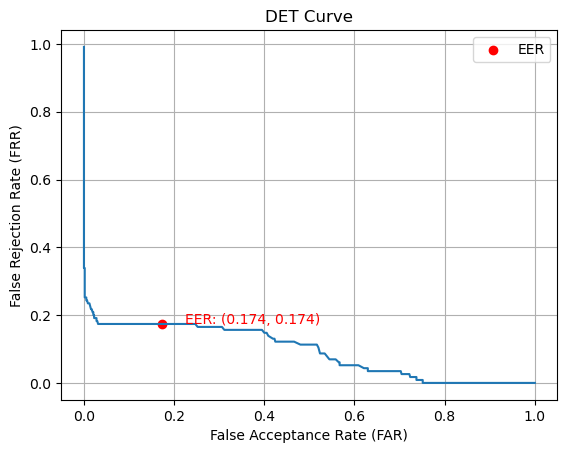

In [31]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_3_F_128:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 10 seconds segments :

## Get the scores

In [32]:
results_10_F_128 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_10_F.items():
    score = get_scores(test_segment, gmm_models_F_128)
    results_10_F_128.append((test_segment_name, score))

# Printing the results
for result in results_10_F_128:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: F1.10.1.mfcc ,Score: {'F1': -58.499178576139805, 'F2': -61.21786799248606, 'F3': -66.00721167108665, 'F4': -88.70835826191005, 'F5': -76.19248946098685, 'F6': -67.81902385818181}
File: F1.10.2.mfcc ,Score: {'F1': -58.12897203619011, 'F2': -58.925117902637766, 'F3': -65.06178128935687, 'F4': -88.33375370490603, 'F5': -77.67510323475086, 'F6': -67.47595128030122}
File: F1.10.3.mfcc ,Score: {'F1': -58.82554272501089, 'F2': -59.66576836723744, 'F3': -68.15209628233798, 'F4': -91.8959819683473, 'F5': -78.3760961744629, 'F6': -66.96794458074511}
File: F1.10.4.mfcc ,Score: {'F1': -57.5656101357579, 'F2': -61.818650776270644, 'F3': -62.85569666610965, 'F4': -85.75165607632849, 'F5': -81.1046072149449, 'F6': -70.14636282651172}
File: F1.10.5.mfcc ,Score: {'F1': -56.19541672955876, 'F2': -61.18148864473027, 'F3': -64.69122814068393, 'F4': -88.29393318728121, 'F5': -79.53176437635311, 'F6': -67.31107407423933}
File: F1.10.6.mfcc ,Score: {'F1': -55.539373759014694, 'F2': -63.52852067973255, 

## Sort the scores 

In [33]:
# Extract the scores from results_10_F_128
scores = [score for _, score in results_10_F_128]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot the curve 

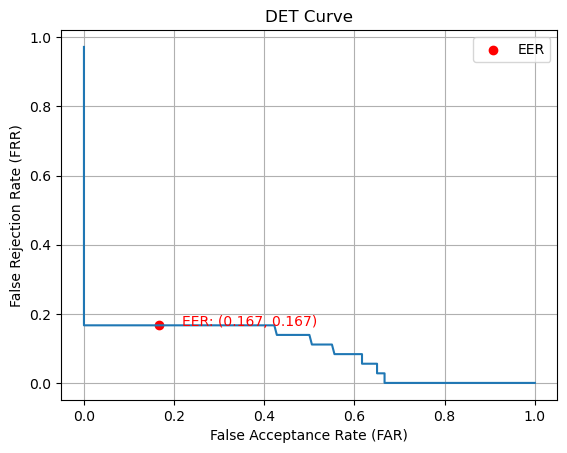

In [34]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_10_F_128:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 15 seconds segments :

## Get the scores

In [35]:
results_15_F_128 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_15_F.items():
    score = get_scores(test_segment, gmm_models_F_128)
    results_15_F_128.append((test_segment_name, score))

# Printing the results
for result in results_15_F_128:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: F1.15.1.mfcc ,Score: {'F1': -58.063411898500924, 'F2': -60.14903419136562, 'F3': -65.62716491145274, 'F4': -87.96262718344201, 'F5': -76.81874260925822, 'F6': -67.28978213556249}
File: F1.15.2.mfcc ,Score: {'F1': -58.90571699305961, 'F2': -59.72346865020855, 'F3': -67.18689458373495, 'F4': -91.32943544000027, 'F5': -78.01038330420886, 'F6': -67.55216434392294}
File: F1.15.3.mfcc ,Score: {'F1': -57.01469071776926, 'F2': -60.73356921154655, 'F3': -63.84376235210593, 'F4': -86.1410800697851, 'F5': -80.1897372449906, 'F6': -68.33851494026896}
File: F1.15.4.mfcc ,Score: {'F1': -55.94888851394961, 'F2': -63.646780072241114, 'F3': -65.01904784894779, 'F4': -86.93619453530137, 'F5': -77.11529220930537, 'F6': -68.0212686021447}
File: F2.15.1.mfcc ,Score: {'F1': -65.64596255894419, 'F2': -55.38060085955769, 'F3': -63.23034967431846, 'F4': -88.69087891759604, 'F5': -73.03353060792827, 'F6': -66.01366536495799}
File: F2.15.2.mfcc ,Score: {'F1': -64.3472797363022, 'F2': -54.38349307766241, 'F

## Sort the scores

In [36]:
# Extract the scores from results_15_F_128
scores = [score for _, score in results_15_F_128]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


##  Plot the DET curve 

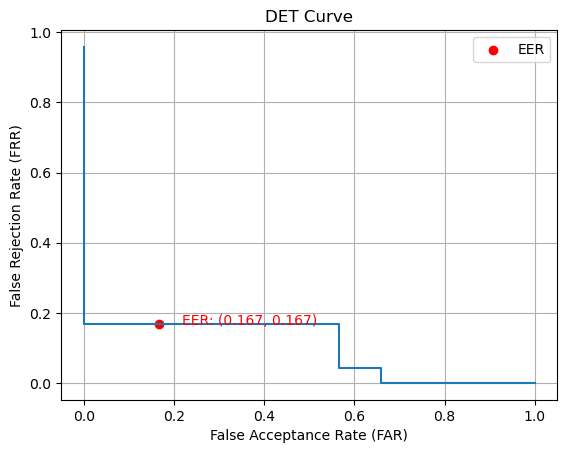

In [37]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_15_F_128:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 30 seconds segments :

## Get the scores

In [38]:
results_30_F_128 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_30_F.items():
    score = get_scores(test_segment, gmm_models_F_128)
    results_30_F_128.append((test_segment_name, score))

# Printing the results
for result in results_30_F_128:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: F1.30.1.mfcc ,Score: {'F1': -58.48456444578027, 'F2': -59.93625142078709, 'F3': -66.40702974759385, 'F4': -89.64603131172113, 'F5': -77.41456295673353, 'F6': -67.42097323974271}
File: F1.30.2.mfcc ,Score: {'F1': -56.553084774618355, 'F2': -61.995299992482295, 'F3': -64.35278622942293, 'F4': -86.48544937344408, 'F5': -78.85817488259632, 'F6': -68.20111346502695}
File: F2.30.1.mfcc ,Score: {'F1': -64.99662114762319, 'F2': -54.88204696861005, 'F3': -62.87189751440173, 'F4': -89.26451760733981, 'F5': -72.42447172519563, 'F6': -65.53783350025037}
File: F2.30.2.mfcc ,Score: {'F1': -65.17842381913344, 'F2': -55.036614393933135, 'F3': -62.444121718892305, 'F4': -88.16684818491441, 'F5': -71.5118044946518, 'F6': -66.31912323825729}
File: F3.30.1.mfcc ,Score: {'F1': -66.43069749893853, 'F2': -66.52639743500639, 'F3': -55.80984926327679, 'F4': -99.88340006714385, 'F5': -75.43681029561549, 'F6': -73.26979464041356}
File: F3.30.2.mfcc ,Score: {'F1': -65.47825826905945, 'F2': -65.4917899076754

## Sort the scores

In [39]:
# Extract the scores from results_30_F_128
scores = [score for _, score in results_30_F_128]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot the DET curve

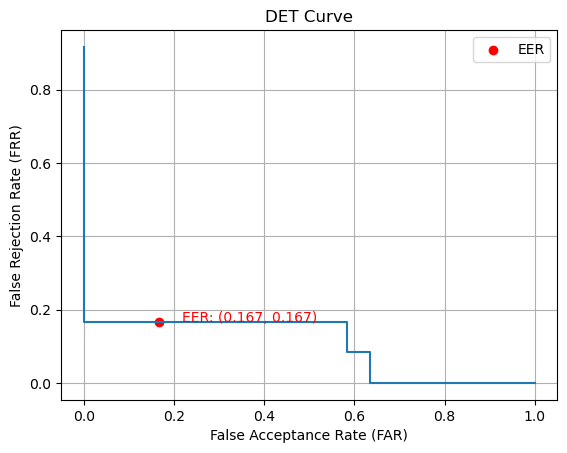

In [40]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_30_F_128:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


## d. GMM 256:
### 3 seconds segments :

## Get the scores

In [41]:
results_3_F_256 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_3_F.items():
    score = get_scores(test_segment, gmm_models_F_256)
    results_3_F_256.append((test_segment_name, score))

# Printing the results
for result in results_3_F_256:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: F1.3.1.mfcc ,Score: {'F1': -69.29361420117765, 'F2': -71.92981528344862, 'F3': -77.66099185315579, 'F4': -151.09928827725494, 'F5': -86.90109477111085, 'F6': -76.68064463954686}
File: F1.3.10.mfcc ,Score: {'F1': -64.14965393259259, 'F2': -67.55900567519112, 'F3': -73.34072537291597, 'F4': -146.5483427852155, 'F5': -87.25823656576512, 'F6': -69.79461739365583}
File: F1.3.11.mfcc ,Score: {'F1': -71.70064586181618, 'F2': -70.01722047069651, 'F3': -75.58392120157386, 'F4': -156.68912555814285, 'F5': -95.37494541316943, 'F6': -76.84664544310502}
File: F1.3.12.mfcc ,Score: {'F1': -67.14000739928228, 'F2': -64.02058848966767, 'F3': -70.25551881773181, 'F4': -132.74712936147873, 'F5': -92.97943308020527, 'F6': -74.75319292473073}
File: F1.3.13.mfcc ,Score: {'F1': -91.35644794608031, 'F2': -85.58236272320052, 'F3': -69.12962805214407, 'F4': -135.4661908775266, 'F5': -98.32554883376746, 'F6': -93.8638726750503}
File: F1.3.14.mfcc ,Score: {'F1': -63.397650848829436, 'F2': -66.22664493046764

## Sort the scores

In [42]:
# Extract the scores from results_3_F_256
scores = [score for _, score in results_3_F_256]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot the DET curve

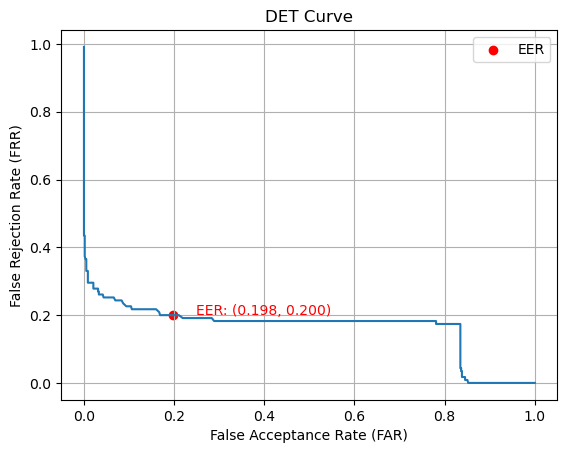

In [43]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_3_F_256:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 10 seconds segments :

## Get the scores

In [44]:
results_10_F_256 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_10_F.items():
    score = get_scores(test_segment, gmm_models_F_256)
    results_10_F_256.append((test_segment_name, score))

# Printing the results
for result in results_10_F_256:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: F1.10.1.mfcc ,Score: {'F1': -68.05627334020252, 'F2': -70.82149483290223, 'F3': -75.03381653212482, 'F4': -151.36119231233525, 'F5': -90.2032358018524, 'F6': -75.11595749997583}
File: F1.10.2.mfcc ,Score: {'F1': -70.09472342437448, 'F2': -67.70351285718553, 'F3': -75.28280283554966, 'F4': -149.41208124896332, 'F5': -93.31000875147818, 'F6': -75.25810818092168}
File: F1.10.3.mfcc ,Score: {'F1': -69.04168179800011, 'F2': -68.4753770537103, 'F3': -78.14540336950729, 'F4': -154.92097599208378, 'F5': -90.88189787241144, 'F6': -74.43360733953746}
File: F1.10.4.mfcc ,Score: {'F1': -75.22962774223357, 'F2': -72.6001599527958, 'F3': -71.84667422161236, 'F4': -141.3114766202331, 'F5': -94.68790145554414, 'F6': -80.98909718356352}
File: F1.10.5.mfcc ,Score: {'F1': -67.63717284456786, 'F2': -70.11764087484102, 'F3': -74.99347668378941, 'F4': -141.88197528498043, 'F5': -91.74604316380821, 'F6': -75.78249445905631}
File: F1.10.6.mfcc ,Score: {'F1': -62.77838920211615, 'F2': -74.04433783452446,

## Sort the scores

In [45]:
# Extract the scores from results_10_F_256
scores = [score for _, score in results_10_F_256]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


##  Plot the DET curve 

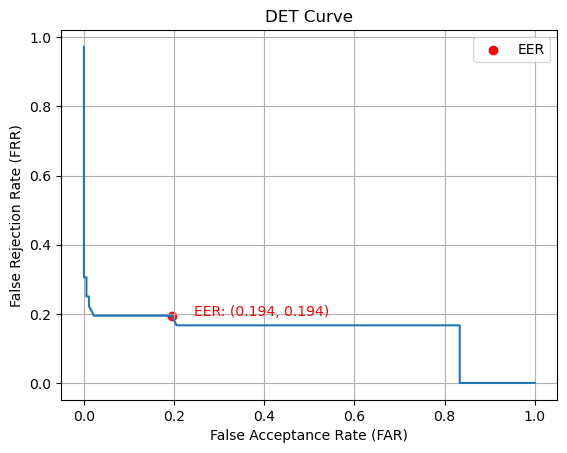

In [46]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_10_F_256:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 15 seconds segments :

## Get the scores

In [47]:
results_15_F_256 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_15_F.items():
    score = get_scores(test_segment, gmm_models_F_256)
    results_15_F_256.append((test_segment_name, score))

# Printing the results
for result in results_15_F_256:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: F1.15.1.mfcc ,Score: {'F1': -67.43236195407742, 'F2': -69.45056017236428, 'F3': -75.05223362947912, 'F4': -150.49654207696682, 'F5': -91.13652176361636, 'F6': -74.87131729244513}
File: F1.15.2.mfcc ,Score: {'F1': -70.69609042097397, 'F2': -68.5496963235011, 'F3': -77.25578152864207, 'F4': -153.29962429195473, 'F5': -91.7935731868783, 'F6': -75.0004647211782}
File: F1.15.3.mfcc ,Score: {'F1': -71.43980122539705, 'F2': -70.4215800892739, 'F3': -73.31951308427763, 'F4': -140.83139918836054, 'F5': -93.41065396847138, 'F6': -78.05655744758097}
File: F1.15.4.mfcc ,Score: {'F1': -66.54619386847546, 'F2': -74.09954008274762, 'F3': -75.74812557774658, 'F4': -144.45657063460163, 'F5': -90.69879751779983, 'F6': -76.73157915429262}
File: F2.15.1.mfcc ,Score: {'F1': -78.179464156126, 'F2': -62.613897318316255, 'F3': -71.82309172171458, 'F4': -141.9608964730328, 'F5': -88.54785201486571, 'F6': -75.27591692505686}
File: F2.15.2.mfcc ,Score: {'F1': -77.84365842241138, 'F2': -62.07448604026257, '

## Sort the scores

In [48]:
# Extract the scores from results_15_F_256
scores = [score for _, score in results_15_F_256]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot the DET curve

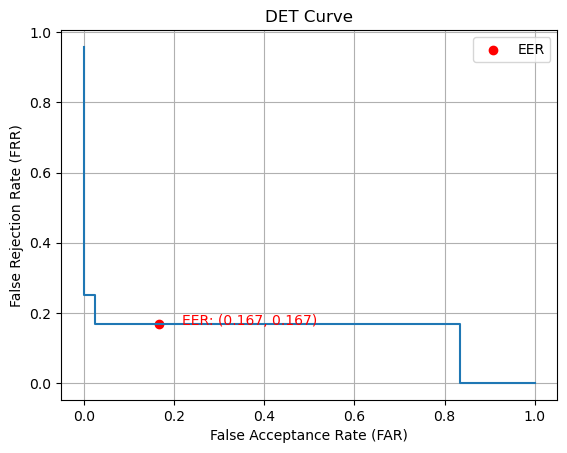

In [49]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_15_F_256:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 30 seconds segments :

## Get the scores

In [50]:
results_30_F_256 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_30_F.items():
    score = get_scores(test_segment, gmm_models_F_256)
    results_30_F_256.append((test_segment_name, score))

# Printing the results
for result in results_30_F_256:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: F1.30.1.mfcc ,Score: {'F1': -69.06422618752569, 'F2': -69.00012824793268, 'F3': -76.15400757906059, 'F4': -151.89808318446077, 'F5': -91.46504747524733, 'F6': -74.93589100681166}
File: F1.30.2.mfcc ,Score: {'F1': -69.32034769892987, 'F2': -72.01452874857885, 'F3': -74.37136112566668, 'F4': -142.40148478072348, 'F5': -92.2361311066159, 'F6': -77.4827006357486}
File: F2.30.1.mfcc ,Score: {'F1': -78.01156128926868, 'F2': -62.34419167928941, 'F3': -71.86055604006596, 'F4': -141.0011207635095, 'F5': -86.67104758202228, 'F6': -74.88316653601738}
File: F2.30.2.mfcc ,Score: {'F1': -78.5677361478075, 'F2': -62.63939529999988, 'F3': -72.9913372259211, 'F4': -140.11684609755483, 'F5': -84.9314112048195, 'F6': -76.80723093301143}
File: F3.30.1.mfcc ,Score: {'F1': -82.29575957416313, 'F2': -78.9305689301715, 'F3': -65.19737725612679, 'F4': -156.27027466340735, 'F5': -89.55999166940164, 'F6': -85.71172186117762}
File: F3.30.2.mfcc ,Score: {'F1': -82.1969349796857, 'F2': -78.24538534279576, 'F3

## Sort the scores

In [51]:
# Extract the scores from results_30_F_256
scores = [score for _, score in results_30_F_256]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot  the DET curve

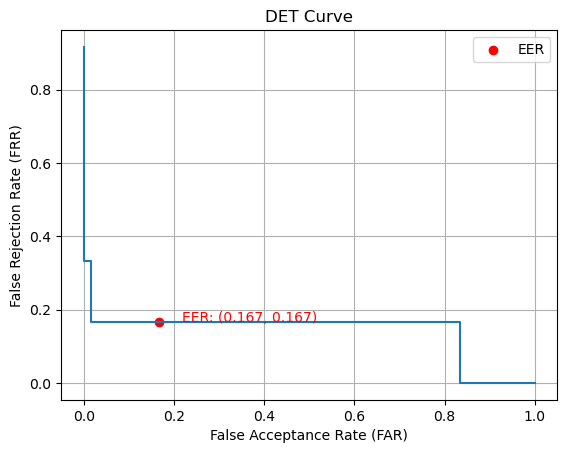

In [52]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_30_F_256:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()
